<a href="https://colab.research.google.com/github/minson18/AI-Capstone-Program1/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
# Root Path
os.chdir('/content/drive/MyDrive/AI總整/prog1')

TRAIN_PATH = "task3.csv"

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import random
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [ ]:
from functools import reduce
def report_average(reports):
    mean_dict = dict()
    for label in reports[0].keys():
        dictionary = dict()

        if label in 'accuracy':
            mean_dict[label] = sum(d[label] for d in reports) / len(reports)
            continue

        for key in reports[0][label].keys():
            dictionary[key] = sum(d[label][key] for d in reports) / len(reports)
        mean_dict[label] = dictionary

    return mean_dict

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = pd.read_csv(TRAIN_PATH, encoding= 'unicode_escape')
documents = data["sentence"].values.tolist()
Y = data["label"].to_numpy()

# Feature Extraction
tfidfconverter = TfidfVectorizer(max_features=100, min_df=2, max_df=1.0)
X = tfidfconverter.fit_transform(documents)
X = np.array(X.toarray())

In [ ]:
# Statistic of dataset
words_list = tfidfconverter.get_feature_names_out()
print(len(words_list))
print('Varience:', np.var(X))
freq = np.sum(X, axis=0)
top_10 = np.argsort(-freq)[:10]
print("Top 10 Words", words_list[top_10])

100
Varience: 0.009060355114832499
['the' 'and' 'to' 'he' 'of' 'was' 'had' 'in' 'it' 'his']


In [ ]:
# Cross Validation Process
# clf:Classifier, X, Y, K:folds of KFold
def Cross_Val(clf, X, Y, k):
  kf = KFold(n_splits=k, shuffle=True)
  CMs = [] # all Confusion Matrices
  reports = [] # all Classification Reports

  for train_index, val_index in kf.split(X):
    x_train = X[train_index]
    y_train = Y[train_index]
    x_val = X[val_index]
    y_val = Y[val_index]

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    CM = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred, digits=4, output_dict=True)
    CMs.append(CM)
    reports.append(report)

  avg_report = report_average(reports)
  print(pd.DataFrame(avg_report).T)
  total_CM = sum(CMs)
  disp = ConfusionMatrixDisplay(confusion_matrix=total_CM, display_labels=np.array([0, 1]))
  disp.plot()
  plt.show()

  return total_CM, avg_report 

              precision    recall  f1-score   support
0              0.456667  0.540000  0.420476  3.200000
1              0.640000  0.586667  0.560476  4.200000
accuracy       0.507143  0.507143  0.507143  0.507143
macro avg      0.548333  0.563333  0.490476  7.400000
weighted avg   0.636190  0.507143  0.513810  7.400000


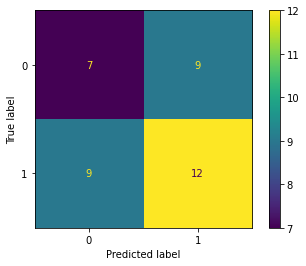

In [ ]:
# Define Diferent Size of Dataset
X_train, _, y_train, _ = train_test_split(X, Y, train_size=0.2, random_state=0)

# RandomForest Experiment
CM, report = Cross_Val(RandomForestClassifier(n_estimators=100, max_depth=None, 
                          random_state=0), X_train, y_train, 5)

              precision    recall  f1-score    support
0              0.585189  0.928947  0.709686  17.000000
1              0.888889  0.466068  0.601190  20.800000
accuracy       0.666714  0.666714  0.666714   0.666714
macro avg      0.737039  0.697508  0.655438  37.800000
weighted avg   0.766225  0.666714  0.653305  37.800000


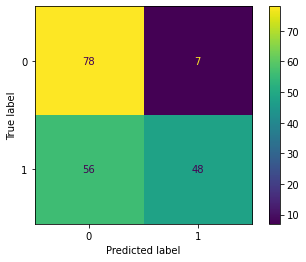

In [ ]:
# KNN Experiment
CM, report = Cross_Val(KNeighborsClassifier(n_neighbors=10), X, Y, 5)

              precision    recall  f1-score    support
0              0.814764  0.858971  0.836012  17.000000
1              0.875615  0.835209  0.854742  20.800000
accuracy       0.846942  0.846942  0.846942   0.846942
macro avg      0.845190  0.847090  0.845377  37.800000
weighted avg   0.849194  0.846942  0.847321  37.800000


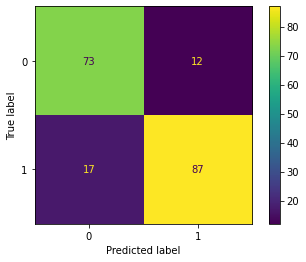

In [ ]:
CMs, reports = Cross_Val(XGBClassifier(), X, Y, 5)